In [22]:
import os
import numpy as np
import gym
import matplotlib.pyplot as plt
%matplotlib inline
print ("plt version:[{}]".format(matplotlib.__version__))
print ("gym version:[{}]".format(gym.__version__))

plt version:[3.4.3]
gym version:[0.20.0]


dataset :https://people.sc.fsu.edu/~jburkardt/datasets/tsp/tsp.html

In [23]:
tsp_data_txt = open('tsp_dataset.txt')

In [24]:
lines = tsp_data_txt.readlines()

In [25]:
data = {}

distance_matrix = np.zeros((len(lines),len(lines)))
for i,line in enumerate(lines):
    for j,element in enumerate((line.split('\n')[0].split('       '))):
        if(element == ''):
            continue
        
        distance_matrix[i][j-1] = int(element.strip())
data['distance_matrix']= distance_matrix
data['num_vehicles'] = 1
data['depot'] = 0


In [26]:
from ortools.constraint_solver import pywrapcp
from ortools.constraint_solver import routing_enums_pb2

In [27]:
manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                       data['num_vehicles'], data['depot'])
routing = pywrapcp.RoutingModel(manager)

In [28]:
def distance_callback(from_index, to_index):
    """Returns the distance between the two nodes."""
    # Convert from routing variable Index to distance matrix NodeIndex.
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return data['distance_matrix'][from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)

In [29]:
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (
    routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

In [30]:
def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print('Objective: {} miles'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'Route for vehicle 0:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'Route distance: {}miles\n'.format(route_distance)
    print(plan_output)

<h1>TSP OR solutions</h1>

In [31]:
solution = routing.SolveWithParameters(search_parameters)
if solution:
    print_solution(manager, routing, solution)

Objective: 291 miles
Route for vehicle 0:
 0 -> 12 -> 1 -> 14 -> 8 -> 4 -> 6 -> 2 -> 11 -> 13 -> 9 -> 7 -> 5 -> 3 -> 10 -> 0

Route for vehicle 0:
 0 -> 12 -> 1 -> 14 -> 8 -> 4 -> 6 -> 2 -> 11 -> 13 -> 9 -> 7 -> 5 -> 3 -> 10 -> 0
Route distance: 291miles



In [87]:
tour_list = [0,12,1,14,8 , 4 , 6 , 2 , 11 , 13 , 9, 7 , 5 , 3 , 10 , 0]


In [84]:
def visualize_map_route(data,tour_list=None):
    scaled_distance_matrix = data['distance_matrix']/100
    x_point = []
    y_point = []
    for di,dis in enumerate(scaled_distance_matrix[0]):
        if di%2 ==0 :
            x_point.append(dis-di*0.05*dis)
            y_point.append(di*0.01*dis)
        elif di%3==0:
            x_point.append(dis/2)
            y_point.append(dis/2)
        else:
            x_point.append(di*0.05*dis)
            y_point.append(dis-di*0.05*dis)
            
    plt.plot(x_point,y_point,'bo')
    plt.plot(x_point[0],y_point[0],'bo',color='red')
    line_x = []
    line_y = []
    if tour_list!=None:
        for tl in tour_list:
            line_x.append(x_point[tl])
            line_y.append(y_point[tl])
            
        plt.plot(line_x,line_y)

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_17588/2649083656.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_point[0],y_point[0],'bo',color='red')


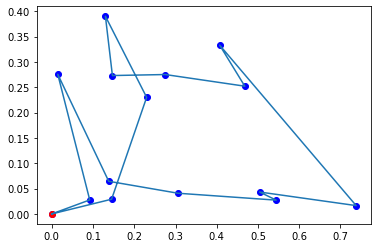

In [88]:
visualize_map_route(data,tour_list)

In [44]:
coordinate_list = []

In [67]:
for a in scaled_distance_matrix:
    print(a)

[0.   0.29 0.82 0.46 0.68 0.52 0.72 0.42 0.51 0.55 0.29 0.74 0.23 0.72
 0.46]
[0.29 0.   0.55 0.46 0.42 0.43 0.43 0.23 0.23 0.31 0.41 0.51 0.11 0.52
 0.21]
[0.82 0.55 0.   0.68 0.46 0.55 0.23 0.43 0.41 0.29 0.79 0.21 0.64 0.31
 0.51]
[0.46 0.46 0.68 0.   0.82 0.15 0.72 0.31 0.62 0.42 0.21 0.51 0.51 0.43
 0.64]
[0.68 0.42 0.46 0.82 0.   0.74 0.23 0.52 0.21 0.46 0.82 0.58 0.46 0.65
 0.23]
[0.52 0.43 0.55 0.15 0.74 0.   0.61 0.23 0.55 0.31 0.33 0.37 0.51 0.29
 0.59]
[0.72 0.43 0.23 0.72 0.23 0.61 0.   0.42 0.23 0.31 0.77 0.37 0.51 0.46
 0.33]
[0.42 0.23 0.43 0.31 0.52 0.23 0.42 0.   0.33 0.15 0.37 0.33 0.33 0.31
 0.37]
[0.51 0.23 0.41 0.62 0.21 0.55 0.23 0.33 0.   0.29 0.62 0.46 0.29 0.51
 0.11]
[0.55 0.31 0.29 0.42 0.46 0.31 0.31 0.15 0.29 0.   0.51 0.21 0.41 0.23
 0.37]
[0.29 0.41 0.79 0.21 0.82 0.33 0.77 0.37 0.62 0.51 0.   0.65 0.42 0.59
 0.61]
[0.74 0.51 0.21 0.51 0.58 0.37 0.37 0.33 0.46 0.21 0.65 0.   0.61 0.11
 0.55]
[0.23 0.11 0.64 0.51 0.46 0.51 0.51 0.33 0.29 0.41 0.42 0.61 0. 

In [89]:
distance_matrix

array([[ 0., 29., 82., 46., 68., 52., 72., 42., 51., 55., 29., 74., 23.,
        72., 46.],
       [29.,  0., 55., 46., 42., 43., 43., 23., 23., 31., 41., 51., 11.,
        52., 21.],
       [82., 55.,  0., 68., 46., 55., 23., 43., 41., 29., 79., 21., 64.,
        31., 51.],
       [46., 46., 68.,  0., 82., 15., 72., 31., 62., 42., 21., 51., 51.,
        43., 64.],
       [68., 42., 46., 82.,  0., 74., 23., 52., 21., 46., 82., 58., 46.,
        65., 23.],
       [52., 43., 55., 15., 74.,  0., 61., 23., 55., 31., 33., 37., 51.,
        29., 59.],
       [72., 43., 23., 72., 23., 61.,  0., 42., 23., 31., 77., 37., 51.,
        46., 33.],
       [42., 23., 43., 31., 52., 23., 42.,  0., 33., 15., 37., 33., 33.,
        31., 37.],
       [51., 23., 41., 62., 21., 55., 23., 33.,  0., 29., 62., 46., 29.,
        51., 11.],
       [55., 31., 29., 42., 46., 31., 31., 15., 29.,  0., 51., 21., 41.,
        23., 37.],
       [29., 41., 79., 21., 82., 33., 77., 37., 62., 51.,  0., 65., 42.,
       